**Next Steps**
- Consider removing features based on correlation matrix (high correlation = collinearity)
- Consider doing Welch t-test (if normal) or Wilcoxon Rank sum (if not normal/skewed) to see diff in means for Fire Start Day group vs. other group. How would this help us?
- Consider standardize variables to mean 0, stddev 1
- Discuss treatment of outliers: does what I did make sense to folks? Happy to do whatever!
- Change season to one-hot encoding? Idk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import math
import warnings
from os.path import join
import os
os.getcwd()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


'/Users/ruchitirumala/Documents/MIDS_Program/DATASCI207/Project_207/207_final_project_Alvaro_Jake_Ruchi_Phillip'

In [2]:
# # Makes working dir the repo - may be needed if have path issues...
# %cd 207_final_project_Alvaro_Jake_Ruchi_Phillip

In [3]:
'''# Parameters
input_path = join(os.getcwd(), 'data', 'CA_Weather_Fire_Dataset_1984-2025.csv')
# path to cleaned data to be used for analysis
output_path = join(os.getcwd(), 'data', 'analysis_df.csv')'''

"# Parameters\ninput_path = join(os.getcwd(), 'data', 'CA_Weather_Fire_Dataset_1984-2025.csv')\n# path to cleaned data to be used for analysis\noutput_path = join(os.getcwd(), 'data', 'analysis_df.csv')"

In [4]:
# Load data
df = pd.read_csv("../CA_Weather_Fire_Dataset_1984-2025.csv")
df.head()

,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,SEASON,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY_OF_YEAR
0,1984-01-01,0.0,79.0,51.0,4.70,False,1984,28.0,0.059494,1,Winter,0.0,4.700,1
1,1984-01-02,0.0,71.0,46.0,5.59,False,1984,25.0,0.078732,1,Winter,0.0,5.145,2
2,1984-01-03,0.0,70.0,47.0,5.37,False,1984,23.0,0.076714,1,Winter,0.0,5.220,3
3,1984-01-04,0.0,76.0,45.0,4.70,False,1984,31.0,0.061842,1,Winter,0.0,5.090,4
4,1984-01-05,0.0,74.0,49.0,5.14,False,1984,25.0,0.069459,1,Winter,0.0,5.100,5


In [5]:

# Convert date col to datez
df['DATE'] = pd.to_datetime(df['DATE'])

# Make season categorical
season = CategoricalDtype(
    categories=['Winter', 'Spring', 'Summer', 'Fall'],
    ordered=False
)

df['SEASON'] = df['SEASON'].astype(season)

In [6]:
df.head()

,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,SEASON,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY_OF_YEAR
0,1984-01-01,0.0,79.0,51.0,4.70,False,1984,28.0,0.059494,1,Winter,0.0,4.700,1
1,1984-01-02,0.0,71.0,46.0,5.59,False,1984,25.0,0.078732,1,Winter,0.0,5.145,2
2,1984-01-03,0.0,70.0,47.0,5.37,False,1984,23.0,0.076714,1,Winter,0.0,5.220,3
3,1984-01-04,0.0,76.0,45.0,4.70,False,1984,31.0,0.061842,1,Winter,0.0,5.090,4
4,1984-01-05,0.0,74.0,49.0,5.14,False,1984,25.0,0.069459,1,Winter,0.0,5.100,5


In [9]:
counts = df['LAGGED_PRECIPITATION'].value_counts()
percentages_formatted = df['LAGGED_PRECIPITATION'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

# Concatenate counts and percentages into one DataFrame
result_df = pd.DataFrame({'Count': counts, 'Percentage': percentages_formatted})
print(result_df)

                      Count Percentage
LAGGED_PRECIPITATION                  
0.00                  10049      67.0%
0.01                    198       1.3%
0.02                     97       0.6%
0.02                     73       0.5%
0.04                     69       0.5%
...                     ...        ...
3.00                      1       0.0%
3.75                      1       0.0%
3.53                      1       0.0%
1.80                      1       0.0%
0.03                      1       0.0%

[1001 rows x 2 columns]


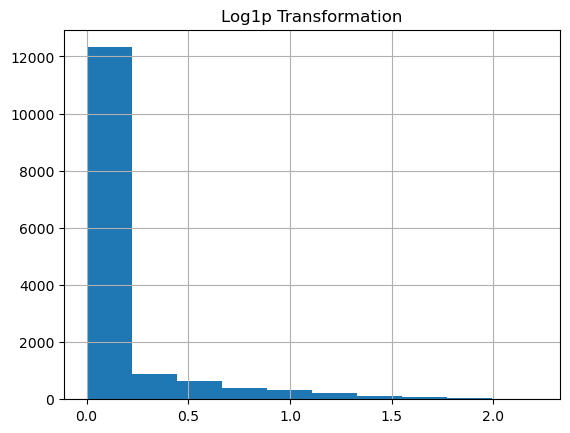

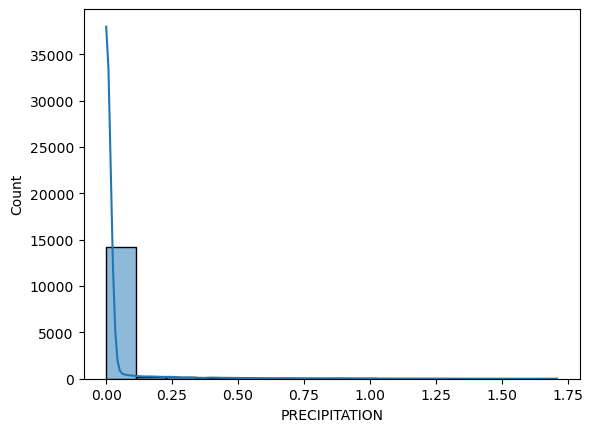

In [11]:

df['LAGGED_PRECIPITATION'].apply(np.log1p).hist()
plt.title("Log1p Transformation")
plt.show()

# Alternatively using Seaborn for better visualization
sns.histplot(np.log1p(df['LAGGED_PRECIPITATION']), kde=True)
plt.show()

In [8]:
df['LAGGED_PRECIPITATION'].value_counts()

LAGGED_PRECIPITATION
0.00    10049
0.01      198
0.02       97
0.02       73
0.04       69
        ...  
3.00        1
3.75        1
3.53        1
1.80        1
0.03        1
Name: count, Length: 1001, dtype: int64

In [7]:
sns.pairplot(df[cols], kind='scatter')

NameError: name 'cols' is not defined

In [ ]:
# Distributions
rows = math.ceil(len(feature_cols)/2)
fig, axs = plt.subplots(rows, 2, figsize=(10,10))
for i, f in enumerate(feature_cols):
    row, col = i%rows, 0 if i<rows else 1
    axs[row, col].hist(df[f], bins=30)
    axs[row, col].set_xlabel(f'{f}')
    if f not in ['SEASON', 'MONTH']:
        mean, std = df[f].mean(), df[f].std()
        axs[row, col].set_title(f"mean={mean:.2f}, std={std:.2f}", fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Finding descriptive statistics to ascertain if any variables need to be log transformed
df.describe()

In [ ]:
print(df.dtypes)

In [ ]:
# Missing values
df.isna().sum()

#### Considering we only have 1- 12 rows of 14988 rows where `avg_wind_speed`, `temp_range` and `wind_temp_ratio` are missing values, we have decided to remove these rows.

In [ ]:
# Drop observations with NaN values
df2 = df.dropna(subset=['AVG_WIND_SPEED', 'MIN_TEMP', 'MAX_TEMP'])
df2.isna().sum()

#### We will consider each row as I.I.D and not consider any time dependency between each row. We are not including the following columns: `date`, `year`, `day_of_year` in our analysis to avoid any temporal dependency between the rows, thus allowing each row to be unique.

In [ ]:
# DATE/YEAR: not helpful in EDA, assuming the underlying climate conditions across years remain relatively constant
# DAY_OF_YEAR: likely same info as Season var
exclude_cols = ['DATE', 'YEAR', 'DAY_OF_YEAR', 'FIRE_START_DAY']

feature_cols = [c for c in df.columns if c not in exclude_cols]
target_col = 'FIRE_START_DAY'
numeric_cols = feature_cols.copy()
cols = feature_cols + [target_col]

In [ ]:
feature_cols

In [ ]:
# 1. creating and printing list of indices mapping to df's rows
indices = df2.index.tolist()
indices

np.random.seed(0)
# 2. Shuffling indices and calling array shuffled_indices. 
shuffled_indices = np.random.permutation(indices)

In [ ]:
#Printing this array
shuffled_indices

In [ ]:
# 3. change the ordering of the dataset based on the order in the shuffled_indices array
df2 = df2.reindex(shuffled_indices)

In [ ]:
# printing head(5) for top 5 rows to confirm they match new index in shuffled_indices
df2.head(5)

### Defining Outcome and Features

In [ ]:
# first outcome dataframe with 'FIRE_START_DAY' and named Y. printing Y
Y = df2[['FIRE_START_DAY']]
Y

In [ ]:
# feature dataframe called X with features of interest: 
X = df2[['PRECIPITATION', 'MAX_TEMP',  'MIN_TEMP',  'AVG_WIND_SPEED', 'TEMP_RANGE',  'WIND_TEMP_RATIO',
 'MONTH',  'SEASON',  'LAGGED_PRECIPITATION',  'LAGGED_AVG_WIND_SPEED']]
X

### Data Splits

In [ ]:
# 1. first splitting test set since train_test_split method only splits 2 sets a time
from sklearn.model_selection import train_test_split
X_temporary, X_test, Y_temporary, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [ ]:
# second splitting test set since train_test_split method only splits 2 sets a time
X_train, X_val, Y_train, Y_val = train_test_split(X_temporary, Y_temporary, test_size=0.25, random_state=1234)

In [ ]:
# 2. printing shape of each array:X_train, X_val, X_test, Y_train, Y_val, Y_test;
print("shape of X_train:", X_train.shape)
print("shape of X_val:", X_val.shape)
print("shape of X_test:", X_test.shape)
print("shape of Y_train:", Y_train.shape)
print("shape of Y_val:", Y_val.shape)
print("shape of Y_test:", Y_test.shape)

In [ ]:
# Examine difference in means btwn fire start day and not fire start day
# Use Welch's t-test to calculate stat sig diff in means
# Assumes normality but with greater than 30 observations, CLT guarantees that. Also assumes no skewness
# Non-parametric test for diff is Wilcoxon Rank Sum Test

In [ ]:
# Collinearities
# For numeric variables, 
#    - calculate Pearson corr for measure of linear correlation
#    - calculate Spearman/Kendall correlation for measure of similarly ranked values in both series
corr_pearson = df[numeric_cols].corr(method='pearson')
corr_spearman = df[numeric_cols].corr(method='spearman')
corr_kendall = df[numeric_cols].corr(method='kendall')

In [ ]:
warnings.filterwarnings('ignore')
# Outlier Identification + Treatment
# Options for treatment: 
#   - winsorization (set lower/upper outliers to 1%/99% -iles)
#   - remove if small percentage of the data, do nothing if not?

for f in numeric_cols:
    q1_pctile, q3_pctile = df2[f].quantile(0.25), df2[f].quantile(0.75)
    iqr = q3_pctile - q1_pctile
    lower, upper = q1_pctile - (1.5*iqr), q3_pctile + (1.5*iqr)
    low_outliers, high_outliers = df2.loc[(df2[f] < lower), :], df2.loc[(df2[f] > upper), :]
    pct_outliers = (len(low_outliers) + len(high_outliers))/len(df2)
    print(f"pct of points for {f} that are outliers: {pct_outliers:.2%}")
    # Winsorize outliers 
    df2[f] = df2[f].clip(lower=df2[f].quantile(0.01),
                         upper=df2[f].quantile(0.99))

In [ ]:
df2.to_csv(output_path, index=False)

**Notes/Questions**
- How do we handle time dependency?

Logistic regression/gradient descent allows for dependence between observations. Will need to consider for train test split (ie use the more recent observations as the test set)

- What to do with time-related features for logistic regression?

Some seem relevant - ie season. But don't think about autocorrelations in observations re: the outcome variable. Think about every sample as independent and then for the time-related features, include them if you thinkn they inform risk for the observation on that given day

- What to do about collinearities? Do we need to handle?

Even if have a perfectly collinear feature, thats still mechanically fine for gradient descent. Gradient descent can handle anything mechanically.

But for the best performance, get rid of collinear features or combine them (add or multiply)

For fitting a logistic regression model, one COULD try every combo of features, fit model, and see which has the best AIC/BIC, but that may be beyond scope. 